<a href="https://colab.research.google.com/github/yashverma165/Deep_learning_exercise/blob/main/Impelmentation_of_ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impelmentation of ANN using Keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
import keras



In [ ]:
print(f"Tensorflow version {tf.__version__}")
print(f"Keras version {keras.__version__}")

Tensorflow version 2.14.0
Keras version 2.14.0


In [ ]:
os.getcwd()

'/content'

##GPU/CPU check


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list=["GPU","CPU"]

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is Available")
    print(f"Details >>{out}")
  else:
    print(f"{device} isn't Available")

GPU is Available
Details >>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is Available
Details >>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


##Creating a simple Classifer on keras on MNIST  Data

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train_full , y_train_full),(x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train_full[0].shape

(28, 28)

In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
print(f"data type of x_train_full:{x_train_full.dtype},\n shape of x_train_full: {x_train_full.shape}")

data type of x_train_full:uint8,
 shape of x_train_full: (60000, 28, 28)


In [ ]:
# Creating a validation dataset from full training data
# Scalting the data between 0 to 1 by dividing by 255. as its an unsigned data between  0-255.
x_valid, x_train = x_train_full[ :5000] / 255 , x_train_full[5000: ] / 255
y_valid, y_train = y_train_full[ :5000]  , y_train_full[5000: ]

# Scale the test set as well
x_test = x_test/255

X train = 55000

X valid = 5000

x test = 10000

In [ ]:
len(x_train_full[5000:])

55000

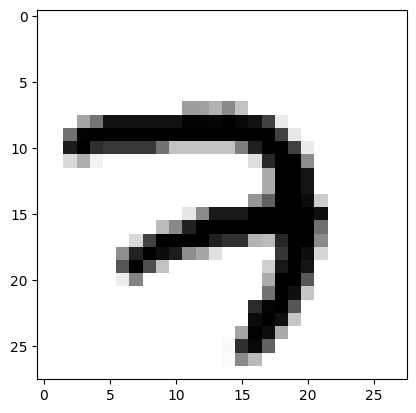

In [ ]:
# lets view some data
plt.imshow(x_train[0],cmap='binary')
plt.show()

<Axes: >

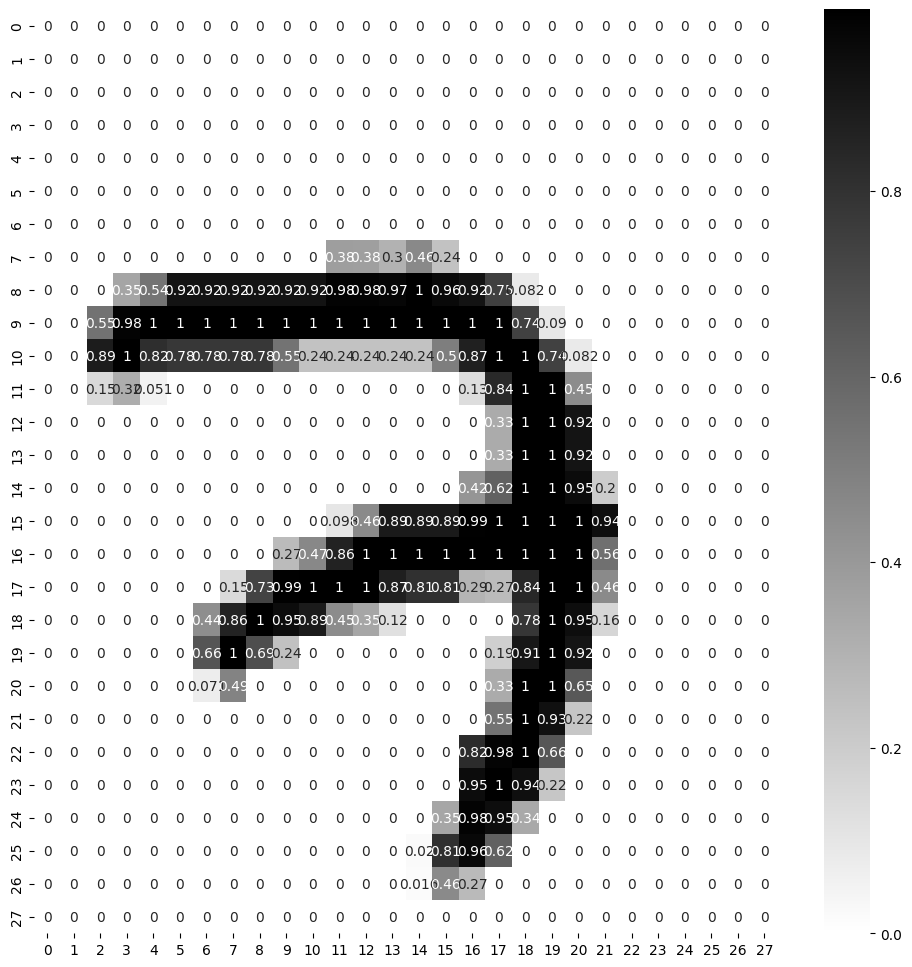

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train[0],annot=True,cmap="binary")

one column contain one image in 28*28 size

In [ ]:
28*28

784

##Architexture used:-
Input-layer , hidden-layer , hidden-layer , Output-layer

-----784---------------300-------------100----------------10         

Method-1 for ANN

In [ ]:
# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name="Inputlayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"),
        tf.keras.layers.Dense(100, activation="relu", name= "hiddenlayer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="outputlayer")]


In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

Method-2 for ANN

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense,Flatten

# define the model
#model = Sequential()
#model.add(Dense(units=300, activation="relu", input_dim=100))
#model.add(Dense(units=10, activation='softmax'))

#compile the model
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Train the model
#model.fit(x_train,y_train,epochs=5 , batch_size=32)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [ ]:

len(hidden1.get_weights())

2

In [ ]:
# get_weights give us2 arrays one is weights and Bias
hidden1.get_weights()

[array([[-0.04388349,  0.07221426,  0.04235012, ..., -0.02530558,
          0.05104375, -0.00638634],
        [ 0.01199592, -0.00097191, -0.04528841, ...,  0.04430845,
         -0.03038462,  0.07154861],
        [ 0.03143103, -0.0526093 ,  0.06449923, ..., -0.03170585,
         -0.06606873,  0.05695435],
        ...,
        [-0.07202905,  0.05067721, -0.02643447, ...,  0.00958027,
         -0.00245825, -0.03041341],
        [ 0.0463671 , -0.00132972,  0.0346396 , ...,  0.04889198,
         -0.02208462, -0.03100864],
        [-0.07059951,  0.06631576, -0.02956822, ..., -0.00983895,
         -0.04130545,  0.05942766]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
#weights
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
#Bias
hidden1.get_weights()[1].shape

(300,)

In [ ]:
loss_fun='sparse_categorical_crossentropy' # use this >>> tf.losses.sparse_categorical_crossentropy
OPTIMIZER='SGD'   # or use with the custom learning rate >>> tf.keras.optimizer.SGD(0.02)
met=["accuracy"]

model_clf.compile(loss=loss_fun,
                  optimizer=OPTIMIZER,
                  metrics=met)

In [ ]:
# training

EPOCHS=30
Validation_set= (x_valid , y_valid)

history = model_clf.fit(x_train, y_train, epochs=EPOCHS,
                        validation_data=Validation_set, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.0174 - accuracy: 0.0988 - val_loss: 5.7230e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 4.2463e-04 - accuracy: 0.0990 - val_loss: 2.6213e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3563e-04 - accuracy: 0.0990 - val_loss: 1.6690e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6231e-04 - accuracy: 0.0990 - val_loss: 1.2139e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.2333e-04 - accuracy: 0.0990 - val_loss: 9.4886e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 9.9199e-05 - accuracy: 0.0990 - val_loss: 7.7637e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 8.2821e-05 - ac

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.017392,0.098836,0.000572,0.0958
1,0.000425,0.098982,0.000262,0.0958
2,0.000236,0.098982,0.000167,0.0958
3,0.000162,0.098982,0.000121,0.0958
4,0.000123,0.098982,0.000095,0.0958
5,0.000099,0.098982,0.000078,0.0958
6,0.000083,0.098982,0.000066,0.0958
7,0.000071,0.098982,0.000057,0.0958
8,0.000062,0.098982,0.000050,0.0958
9,0.000055,0.098982,0.000044,0.0958


<Axes: >

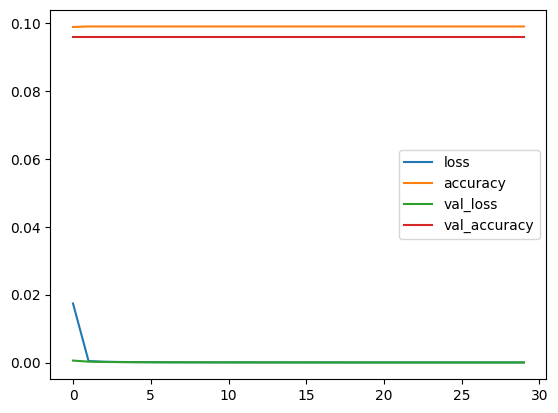

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.3065 - accuracy: 0.0980


[18.306522369384766, 0.09799999743700027]

Sample check-Test data


In [ ]:
x_new = x_test[:3]
#x_new

<Axes: >

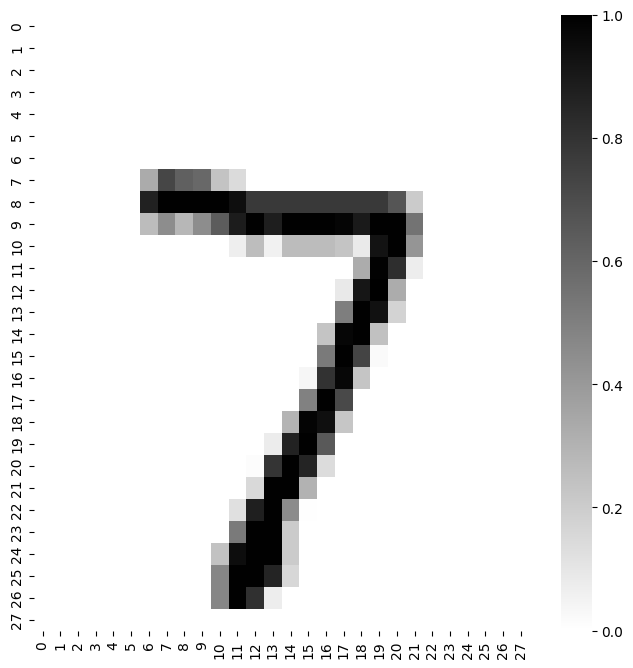

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(x_new[0],cmap='binary')

In [ ]:
actual= y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prod=model_clf.predict(x_new)
y_prod.round()

1/1 [==============================] - 0s 17ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prod,axis=1)
y_pred

array([0, 0, 0])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

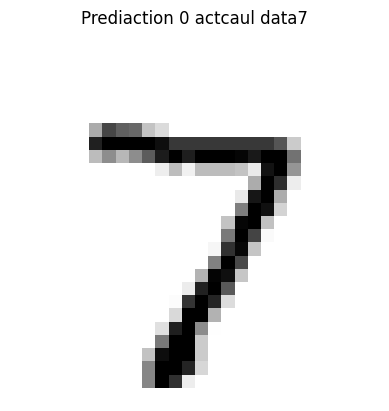

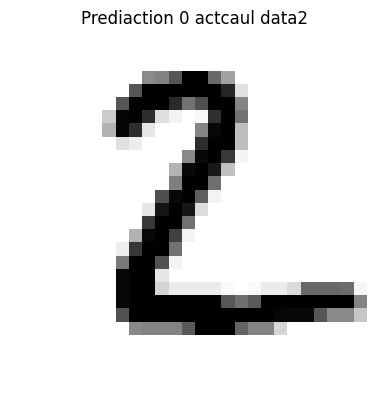

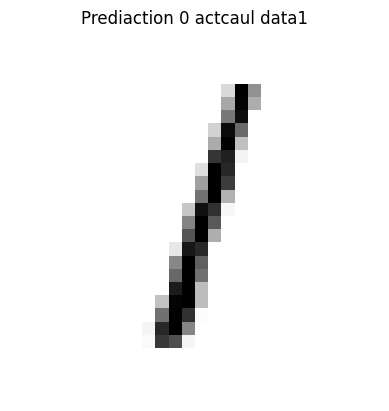

In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data,cmap='binary')
  plt.title(f"Prediaction {pred} actcaul data{actual_data}")
  plt.axis("off")
  plt.show()